In [25]:
import numpy as np
from scipy.integrate import solve_ivp

# matplotlib imports
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation

$\begin{bmatrix} \dot \theta \\ \ddot \theta \end{bmatrix} = \begin{bmatrix} \dot \theta \\ - \dfrac{g \sin \theta}{\ell}\end{bmatrix}$

In [26]:
# assign constants (g, ell) values
g = 9.81
ell = 1

# initial conditions: theta=30 deg, velocity=0
theta0 = np.deg2rad(165)
theta_dot0 = 0

# set the simulation time and frames per second
t_final = 15
fps = 30

# wrapping angle
def wrap_angle(angle):
    return (angle + 180) % 360 - 180

# our system of differential equations
# y[0] is theta, y[1] is theta_dot
def pendulum_ODE(t, y): 
    return (y[1], -g*np.sin(y[0])/ell)

# solve the ODE, 30 fps
sol = solve_ivp(pendulum_ODE, [0, t_final], (theta0, theta_dot0), 
    t_eval=np.linspace(0,t_final,t_final*fps+1))

# output of the solver
theta, theta_dot = sol.y
t = sol.t

# convert from radians to degrees
theta_deg = wrap_angle(np.rad2deg(sol.y[0]))
theta_dot_deg = np.rad2deg(sol.y[1])

# optional: save theta_deg in a CSV file
# np.savetxt('pend.csv', np.transpose([t, theta_deg, theta_dot_deg]), delimiter=',')

In [27]:
# # bonus! Customize color scheme in matplotlib
# # change matplotlib defaults
# plt.rcParams['axes.facecolor'] = 'black'
# plt.rcParams['axes.labelcolor'] = 'white'
# plt.rcParams['axes.titlecolor'] = 'white'
# plt.rcParams['figure.facecolor'] = 'black'
# plt.rcParams['legend.labelcolor'] = 'white'
# plt.rcParams['xtick.labelcolor'] = 'white'
# plt.rcParams['ytick.labelcolor'] = 'white'
# plt.rcParams['grid.color'] = '#707070'

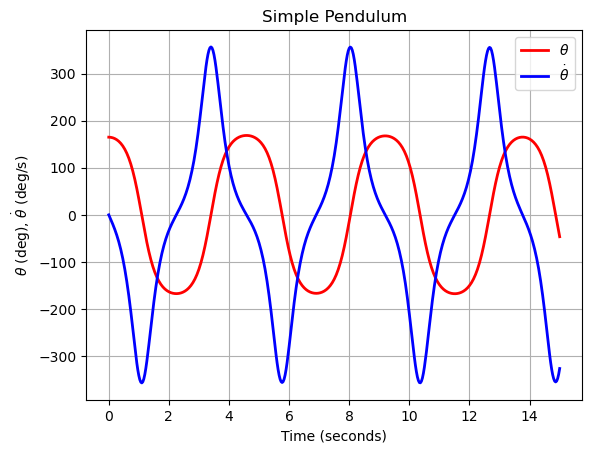

In [28]:
# create a plot of theta and theta_dot vs time
plt.plot(t, theta_deg, 'r', lw=2, label=r'$\theta$')
plt.plot(t, theta_dot_deg, 'b', lw=2, label=r'$\dot \theta$')
plt.title('Simple Pendulum')
plt.legend()
plt.xlabel('Time (seconds)')
plt.ylabel(r'$\theta$ (deg), $\dot \theta$ (deg/s)')
plt.grid()
plt.show()

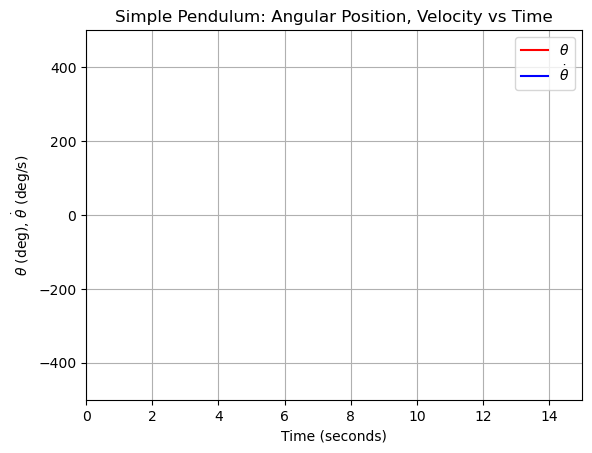

In [29]:
# animate theta, theta_dot vs time
fig, ax = plt.subplots()

theta_curve, = ax.plot(t[0], theta_deg[0], 'r')
theta_dot_curve, = ax.plot(t[0], theta_dot_deg[0], 'b')

ax.set_title('Simple Pendulum: Angular Position, Velocity vs Time')
ax.set_xlim(0, t_final)
ax.set_ylim(-500, 500)
ax.set_xlabel('Time (seconds)')
ax.set_ylabel(r'$\theta$ (deg), $\dot \theta$ (deg/s)')
ax.legend([r'$\theta$', r'$\dot \theta$'])
ax.grid()

def animate(i):
    theta_curve.set_data(t[:i+1], theta_deg[:i+1])
    theta_dot_curve.set_data(t[:i+1], theta_dot_deg[:i+1])

# save video @ 30 fps
anim = animation.FuncAnimation(fig, animate, frames=len(t))
ffmpeg_writer = animation.FFMpegWriter(fps=fps)
anim.save('time_domain.mp4', writer=ffmpeg_writer)
# you need to make sure the ffmpeg is installed on your machine and 
# the path is configured correctly. see Troubleshooting for details

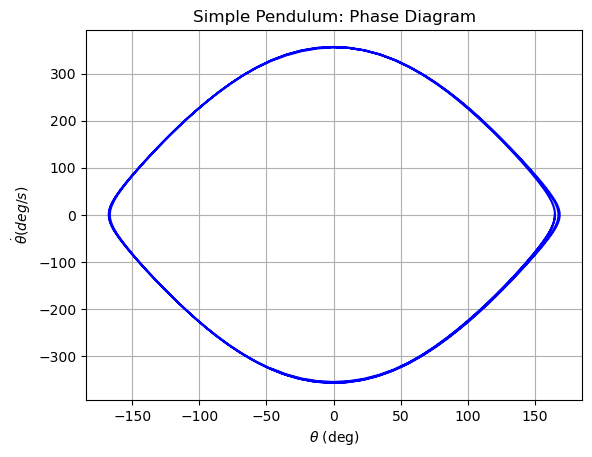

In [30]:
# create a phase diagram of theta, theta_dot
plt.plot(theta_deg, theta_dot_deg, 'b')
plt.title('Simple Pendulum: Phase Diagram')
plt.xlabel(r'$\theta$ (deg)')
plt.ylabel(r'$\dot \theta (deg/s)$')
plt.grid()
plt.show()

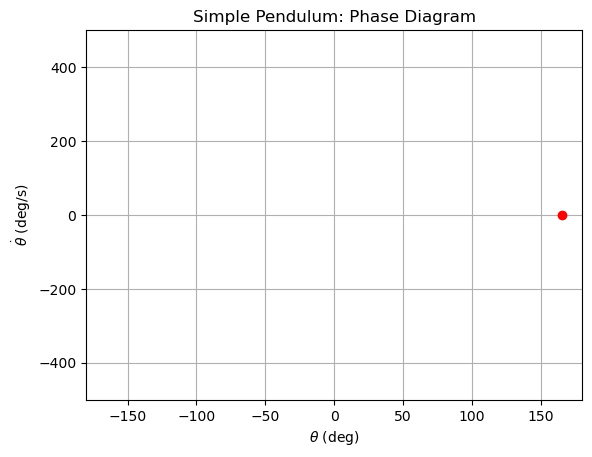

In [31]:
# animate the phase diagram
fig, ax = plt.subplots()

phase_curve, = ax.plot(theta_deg[0], theta_dot_deg[0], 'b')
phase_dot, =  ax.plot(theta_deg[0], theta_dot_deg[0], 'ro')

ax.set_title('Simple Pendulum: Phase Diagram')
ax.set_xlim(-180, 180)
ax.set_ylim(-500, 500)
ax.set_xlabel(r'$\theta$ (deg)')
ax.set_ylabel(r'$\dot \theta$ (deg/s)')
ax.grid()

def animate(i):
    phase_curve.set_data(theta_deg[:i+1], theta_dot_deg[:i+1])
    phase_dot.set_data([theta_deg[i]], [theta_dot_deg[i]])

ani = animation.FuncAnimation(fig, animate, frames=len(t))
ffmpeg_writer = animation.FFMpegWriter(fps=fps)
ani.save('phase_diagram.mp4', writer=ffmpeg_writer)

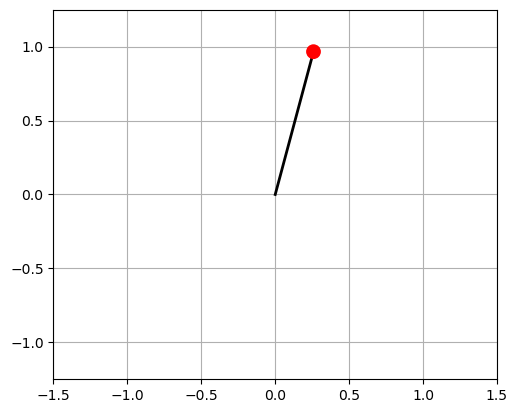

In [ ]:
# create an animation of the pendulum swining with Matplotlib
def pend_pos(theta):
    return (ell*np.sin(theta), -ell*np.cos(theta))

# create figure
fig = plt.figure()
ax = fig.add_subplot(aspect='equal')
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.25, 1.25)
ax.grid()

x0, y0 = pend_pos(theta0)
line, = ax.plot([0, x0], [0, y0], lw=2, c='k')
circle = ax.add_patch(plt.Circle(pend_pos(theta0), 0.05, fc='r', zorder=3))

# animate each frame "i"
def animate(i):
    x,y = pend_pos(theta[i])
    line.set_data([0, x], [0, y])
    circle.set_center((x, y))

# save a video: 30 fps
ani = animation.FuncAnimation(fig, animate, frames=len(t))
ffmpeg_writer = animation.FFMpegWriter(fps=fps)
ani.save('pend.mp4', writer=ffmpeg_writer)